<a href="https://colab.research.google.com/github/isaac4everlast/renamer/blob/master/Copy_of_similarity_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Similarity threshold by a predictive model and validated by human


A similarity threshold is a cut-off point to classify whether two documents are similar or not. The similarity threshold behaves differently depending on vector space model and system domain structure, besides the rule of thumb, there is another approach to approximately select the similarity threshold by using a predictive model (i.e., Logistic Regression model) and validated by human


---
Last update: 24 April 2019



**Load cosine similarity table**

In [0]:
import pickle
f=open("css_table","rb")
css_table=pickle.load(f)
f.close()

**Make it into panda dataframe**


*   column#3 is cosine similarity computed from our system (Word Sense Disambiguation with Wor2vec and WordNet) between column#0 (context) and column#2 (word sense definition)
*   column#4 is given by a binary score (1 if relevant 0 if not relevant) whether column#0 (context) and column#2 (word sense definition) are relevant. This is done by Human without seeing cosine similarity(column#3). Column#1 is a word sense name may help to give a binary score easier.





In [0]:
import pandas as pd
df = pd.DataFrame(css_table) 
df.head()

,0,1,2,3,4
0,That man said Haney peered doubtfully,be.v.03,occupy a certain position or area; be somewhere,[[0.36488017]],0
1,That man said Haney peered doubtfully,be.v.02,be identical to; be someone or something,[[0.35770178]],0
2,That man said Haney peered doubtfully,be.v.01,"have the quality of being; (copula, used with ...",[[0.33516818]],1
3,That man said Haney peered doubtfully,be.v.05,"happen, occur, take place; this was during the...",[[0.325721]],0
4,That man said Haney peered doubtfully,be.v.08,"work in a specific place, with a specific subj...",[[0.28397858]],0


**Convert column #3 to float**

In [0]:
l=[]
for i in range(len(df.iloc[:,3])):
    l.append(float(df.iloc[:,3][i].flatten()))
df.iloc[:,3]=l
df.head()

,0,1,2,3,4
0,That man said Haney peered doubtfully,be.v.03,occupy a certain position or area; be somewhere,0.364880,0
1,That man said Haney peered doubtfully,be.v.02,be identical to; be someone or something,0.357702,0
2,That man said Haney peered doubtfully,be.v.01,"have the quality of being; (copula, used with ...",0.335168,1
3,That man said Haney peered doubtfully,be.v.05,"happen, occur, take place; this was during the...",0.325721,0
4,That man said Haney peered doubtfully,be.v.08,"work in a specific place, with a specific subj...",0.283979,0


**Filter only column#4 that contains 1** 


In [0]:
is_one=df.iloc[:,4]==1
onedf=df[is_one]
onedf.head()

,0,1,2,3,4
2,That man said Haney peered doubtfully,be.v.01,"have the quality of being; (copula, used with ...",[[0.33516818]],1
13,That be said Haney peered doubtfully drinking,man.n.01,an adult person who is male (as opposed to a w...,[[0.35573655]],1
33,That be man Haney peered doubtfully drinking c...,allege.v.01,report or maintain,[[0.21140294]],1
35,That be man said Haney doubtfully drinking com...,peer.v.01,look searchingly,[[0.48842093]],1
36,said Haney peered doubtfully drinking bleary t...,companion.n.01,a friend who is frequently in the company of a...,[[0.39331543]],1


**Filter only column#4 that contains 0** 



In [0]:
is_zero=df.iloc[:,4]==0
zerodf=df[is_zero]
zerodf.head()

,0,1,2,3,4
0,That man said Haney peered doubtfully,be.v.03,occupy a certain position or area; be somewhere,[[0.36488017]],0
1,That man said Haney peered doubtfully,be.v.02,be identical to; be someone or something,[[0.35770178]],0
3,That man said Haney peered doubtfully,be.v.05,"happen, occur, take place; this was during the...",[[0.325721]],0
4,That man said Haney peered doubtfully,be.v.08,"work in a specific place, with a specific subj...",[[0.28397858]],0
5,That man said Haney peered doubtfully,embody.v.02,"represent, as of a character on stage",[[0.27608478]],0


**Sample from onedf and zerodf each for 1000 reccords for making balance dataset**

In [0]:
onedf_sample=onedf.sample(n=1000, random_state=1)
onedf_sample.head()

,0,1,2,3,4
10330,hole waiting game start I temblor begin glance...,feel.v.03,"perceive by a physical sensation, e.g., coming...",[[0.2956411]],1
2827,nodded farewell Haney watched small man slip d...,stringy.s.01,lean and sinewy,[[0.24022974]],1
6786,responsibilities voting office dealing nationa...,issue.n.01,an important question that is in dispute and m...,[[0.42392123]],1
11623,see clouds across bay horrible Marina District...,fire.n.01,the event of something burning (often destruct...,[[0.3275925]],1
1452,usually went alone kept sitting passing time n...,corner.n.03,an interior angle formed by two meeting walls,[[0.39241874]],1


In [0]:
zerodf_sample=zerodf.sample(n=1000, random_state=1)
zerodf_sample.head()

,0,1,2,3,4
6020,know The cops not suspect I thought was coinci...,thing.n.01,a special situation,[[0.52900726]],0
6541,Congress Prior pattern was nearly What account...,inverse.n.01,something inverted in sequence or character or...,[[0.3250884]],0
4780,going be saddled now creep buddy He have start...,browning_automatic_rifle.n.01,a portable .30 caliber automatic rifle operate...,[[0.22661951]],0
455,blurred two hours steady drinking came back Th...,affair.n.03,a vaguely specified social event,[[0.37339756]],0
4108,be tight knew was It same bar was two weeks,equal.v.01,be identical or equivalent to,[[0.2976371]],0


**Make new df from onedf_sample and zero_sample then shuffle it**

In [0]:
from sklearn.utils import shuffle
newdf=onedf_sample.append(zerodf_sample, ignore_index=True)
newdf = shuffle(newdf)
newdf.head()

,0,1,2,3,4
492,severely damaged old lady old are guest room B...,mother.n.01,a woman who has given birth to a child (also u...,[[0.51679826]],1
1950,wondered truck driver seen eyes back It been s...,draw.v.04,"make, formulate, or derive in the mind",[[0.41207674]],0
1479,listener showed alert face suddenly eyes When ...,bright.s.05,made smooth and bright by or as if by rubbing;...,[[0.41021758]],0
1534,I was favorite watering hole game start I felt...,expect.v.03,look forward to the probable occurrence of,[[0.2810401]],0
582,car alarms went The cats fine nervous time DHA...,be.v.01,"have the quality of being; (copula, used with ...",[[0.39857674]],1


**Make a X and y dataset for input to Logistic Regression Model**

In [0]:
X=newdf.iloc[:,3]
X.head()

492     [[0.51679826]]
1950    [[0.41207674]]
1479    [[0.41021758]]
1534     [[0.2810401]]
582     [[0.39857674]]
Name: 3, dtype: object

In [0]:
y=newdf.iloc[:,4]
y.head()

492     1
1950    0
1479    0
1534    0
582     1
Name: 4, dtype: int64

**Create a Logistic Regression Model**

*   Split for X,y dataset to train and test with 0.3 of dataset size
*   Reshape X_train and X_test for input to model
*   Create a Logistic Regression Model with lbfgs solver
*   Fit the model with X_train and y_train (the model will find an equation that minimizes y_train with y_predict)
*  The accuracy of model is 0.63




In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


**Input X_test to the model and produce y_pred **

*   then compare y_pred with y_test and make confusion matrix
*   make classification report
*   make a ROC plot



In [0]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[183 130]
 [ 94 193]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       313
           1       0.60      0.67      0.63       287

   micro avg       0.63      0.63      0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



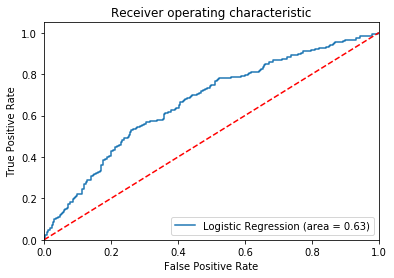

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

**Input X_train to the model and predict a probability of Relevance**


*   then make a spreadsheet between cosine similarity score and probability of Relevance
*   sort column probability of Relevance by descending order



In [0]:
P_relevance = logreg.predict_proba(X_train)
P_relevance

array([[0.43282089, 0.56717911],
       [0.48891315, 0.51108685],
       [0.29364295, 0.70635705],
       ...,
       [0.67842468, 0.32157532],
       [0.54272523, 0.45727477],
       [0.46618517, 0.53381483]])

In [0]:
summary_df = pd.DataFrame(data={"CSS":X_train.flatten(),"Relevant":P_relevance[:,1]})
summary_df.head()

,CSS,Relevant
0,[[0.44699302]],0.567179
1,[[0.38152477]],0.511087
2,[[0.62295043]],0.706357
3,[[0.23220487]],0.384356
4,[[0.35122186]],0.484942


In [0]:
summary_df.sort_values(by=['Relevant'],ascending=False,inplace=True)
summary_df.head()

,CSS,Relevant
798,[[0.71116614]],0.765357
1293,[[0.69774646]],0.756936
605,[[0.6899264]],0.751935
874,[[0.68280256]],0.747319
53,[[0.67116594]],0.739659


**show plot between CSS and P(Relevance)**

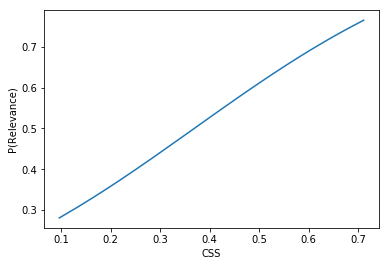

In [0]:
plt.xlabel('CSS')
plt.ylabel('P(Relevance)')
plt.plot(summary_df.loc[:,"CSS"], summary_df.loc[:,"Relevant"]) 

**Filter reccords only when P(Relevance) switch from 0.499 to 0.501**

In [0]:
test1=summary_df.loc[:,"Relevant"]>0.499
test2=summary_df.loc[:,"Relevant"]<0.501
summary_df[test1&test2]

,CSS,Relevant
1370,[[0.3697337]],0.500913
1074,[[0.3696581]],0.500848
766,[[0.36941808]],0.500641
568,[[0.36894268]],0.500230
967,[[0.36863786]],0.499967
119,[[0.3684608]],0.499814
786,[[0.36828294]],0.499661
1136,[[0.36754924]],0.499028


# We found that 0.3689 is the similarity threshold for our system 

*Because P(Relevance) turning from 0.499967 to 0.500230*